In [231]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
from scipy import stats as sts
%matplotlib inline

In [232]:
start = dt.datetime(2014,1,2)
end = dt.datetime(2019,12,30)

In [233]:
#Comparing Returns of FAANG for FY19-20
fb = pdr.DataReader("FB", "yahoo", start, end)
aapl = pdr.DataReader("AAPL", "yahoo", start, end)
amzn = pdr.DataReader("AMZN", "yahoo", start, end)
nflx = pdr.DataReader("NFLX", "yahoo", start, end)
goog = pdr.DataReader("GOOGL", "yahoo", start, end)

In [234]:
#Calculating Daily Returns
#Can directly use fb["Adj Close"].pct_change()
fb["DailRet"] = ((fb["Adj Close"] - fb["Adj Close"].shift(1)) / fb["Adj Close"] ) * 100 
aapl["DailRet"] = ((aapl["Adj Close"] - aapl["Adj Close"].shift(1)) / aapl["Adj Close"] ) * 100 
amzn["DailRet"] = ((amzn["Adj Close"] - amzn["Adj Close"].shift(1)) / amzn["Adj Close"] ) * 100
nflx["DailRet"] = ((nflx["Adj Close"] - nflx["Adj Close"].shift(1)) / nflx["Adj Close"] ) * 100
goog["DailRet"] = ((goog["Adj Close"] - goog["Adj Close"].shift(1)) / goog["Adj Close"] ) * 100

In [242]:
#Percentage Returns
data = pd.DataFrame(columns=["fb","aapl","amzn","nflx","goog"])
data["fb"] = fb["DailRet"]
data["aapl"] = aapl["DailRet"]
data["amzn"] = amzn["DailRet"]
data["nflx"] = nflx["DailRet"]
data["goog"] = goog["DailRet"]
data.head()

,fb,aapl,amzn,nflx,goog
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.274922,-2.245916,-0.385935,0.077116,-0.734846
2014-01-06,4.615383,0.542354,-0.713868,-0.981732,1.102644
2014-01-07,1.243089,-0.720325,1.105443,-5.911632,1.891362
2014-01-08,0.532374,0.629346,0.967858,0.436961,0.207666


In [236]:
#Calculating Absoulte Returns if $1000 is invested in each of 5 stocks on 2014-01-02
dataAbsRet = data
for i in range(5):
    dataAbsRet.iloc[0,i] = 1000 
dataAbsRet.head()

,fb,aapl,amzn,nflx,goog
Date,,,,,
2014-01-02,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2014-01-03,-0.274922,-2.245916,-0.385935,0.077116,-0.734846
2014-01-06,4.615383,0.542354,-0.713868,-0.981732,1.102644
2014-01-07,1.243089,-0.720325,1.105443,-5.911632,1.891362
2014-01-08,0.532374,0.629346,0.967858,0.436961,0.207666


In [237]:
dataAbsRet.iloc[1] = dataAbsRet.iloc[0] * (1+(data.iloc[1]/100))
dataAbsRet.head()

,fb,aapl,amzn,nflx,goog
Date,,,,,
2014-01-02,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2014-01-03,997.250775,977.540837,996.140655,1000.771155,992.651542
2014-01-06,4.615383,0.542354,-0.713868,-0.981732,1.102644
2014-01-07,1.243089,-0.720325,1.105443,-5.911632,1.891362
2014-01-08,0.532374,0.629346,0.967858,0.436961,0.207666


In [238]:
for i in range(2,data.shape[0]):
    dataAbsRet.iloc[i] = dataAbsRet.iloc[i-1] * (1+(data.iloc[i]/100)) 
dataAbsRet.head()

,fb,aapl,amzn,nflx,goog
Date,,,,,
2014-01-02,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2014-01-03,997.250775,977.540837,996.140655,1000.771155,992.651542
2014-01-06,1043.277723,982.842573,989.029528,990.946263,1003.596957
2014-01-07,1056.246598,975.762907,999.962684,932.365163,1022.578606
2014-01-08,1061.869781,981.903833,1009.640902,936.439237,1024.702150


In [243]:
data.head()

,fb,aapl,amzn,nflx,goog
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.274922,-2.245916,-0.385935,0.077116,-0.734846
2014-01-06,4.615383,0.542354,-0.713868,-0.981732,1.102644
2014-01-07,1.243089,-0.720325,1.105443,-5.911632,1.891362
2014-01-08,0.532374,0.629346,0.967858,0.436961,0.207666


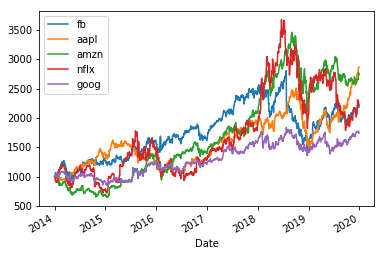

In [240]:
#Graphing Returns
dataAbsRet.plot()

In [244]:
dataAbsRet.corr()

,fb,aapl,amzn,nflx,goog
fb,1.000000,0.707570,0.789783,0.725853,0.878852
aapl,0.707570,1.000000,0.854296,0.797461,0.835325
amzn,0.789783,0.854296,1.000000,0.928961,0.947229
nflx,0.725853,0.797461,0.928961,1.000000,0.863268
goog,0.878852,0.835325,0.947229,0.863268,1.000000
